# **DP 100**

**Notes:** I created this notebook in Google Colaboratory. It is possible to *Run All* since everything is sequenced. 

You can contact me for any questions. Remember that there are many ways to approach problems and many functions/models and methods to arrive at a satisfactory result, this notebook only shows one of those ways and still can/should perform more statistical analysis of the data.

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

In [ ]:
path = 'bank.csv'
data_original = pd.read_csv(path, parse_dates=True)
data_original.head()       

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data_original.index

RangeIndex(start=0, stop=1086, step=1)

In [ ]:
df_unknown_None = data_original.replace('unknown',np.nan, regex=True) 

In [ ]:
#Any unknown data? 
unknown=pd.DataFrame({'Unknown Amount':df_unknown_None.isna().sum()})
unknown

,Nulls Amount
age,0
job,10
marital,2
education,40
default,213
housing,29
loan,29
contact,0
month,0
day_of_week,0


In [ ]:
#Replace all the unknown string by NaN values 
df_clean1=df_unknown_None.replace(r'unknown', np.nan, regex=True)
df_clean1.head()
df_clean1.count() 

age               1086
job               1076
marital           1084
education         1046
default            873
housing           1057
loan              1057
contact           1086
month             1086
day_of_week       1086
duration          1086
campaign          1086
pdays             1086
previous          1086
poutcome          1086
emp_var_rate      1086
cons_price_idx    1086
cons_conf_idx     1086
euribor3m         1086
nr_employed       1086
y                 1086
dtype: int64

In [ ]:
#Any missing data? Yes!
missing=pd.DataFrame({'Nulls Amount':df_clean1.isna().sum()})
missing

,Nulls Amount
age,0
job,10
marital,2
education,40
default,213
housing,29
loan,29
contact,0
month,0
day_of_week,0


In [ ]:
df_clean2 = df_clean1.drop_duplicates() 
df_clean2.index   # there aren´t any duplicate rows

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085],
           dtype='int64', length=1086)

In [ ]:
df_clean2.dtypes  # there aren't any problems with type data

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [ ]:
df_clean1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
col_cat = df_clean1.select_dtypes(include = ["object"]).columns  #voy a seleccionar las columnas categóricas
col_cat[:]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

**Map all categorical feature to numeric**

In [ ]:
colum=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']
colum_Map=['job_Map', 'marital_Map', 'education_Map', 'default_Map', 'housing_Map', 'loan_Map', 'contact_Map','month_Map', 'day_of_week_Map', 'poutcome_Map']

In [ ]:
df = df_clean2['poutcome'].unique()  #result an array
job_list = df.tolist()          #convert to list
job_list

['nonexistent', 'success', 'failure']

In [ ]:
df_clean2['job_Map'] = df_clean2.job.map({'blue-collar':0, 'technician':1, 'management':2, 'services':3, 'retired':4, 'admin.':5,'housemaid':6, 'unemployed':7, 'entrepreneur':8, 'self-employed':9, 'student':10})
df_clean2['marital_Map'] = df_clean2.marital.map({'married':1, 'single':0, 'divorced':2})
df_clean2['education_Map'] = df_clean2.education.map({'basic.4y':0, 'basic.6y':1, 'basic.9y':2, 'high.school':3,'professional.course':4, 'university.degree':5})
df_clean2['default_Map'] = df_clean2.default.map({'no':0, 'yes':1})
df_clean2['housing_Map'] = df_clean2.housing.map({'no':0, 'yes':1})
df_clean2['loan_Map'] = df_clean2.loan.map({'no':0, 'yes':1})
df_clean2['contact_Map'] = df_clean2.contact.map({'cellular':0, 'telephone':1})
df_clean2['month_Map'] = df_clean2.month.map({'aug':8, 'nov':11, 'jun':6, 'apr':4, 'jul':7, 'may':5, 'oct':10, 'mar':3, 'sep':9, 'dec':12})
df_clean2['day_of_week_Map'] = df_clean2.day_of_week.map({'thu':4, 'fri':5, 'tue':2, 'mon':1, 'wed':3})
df_clean2['poutcome_Map'] = df_clean2.poutcome.map({'nonexistent':0, 'success':1, 'failure':2})

In [ ]:
df_clean2.drop(columns=colum, inplace=True)

In [ ]:
df_clean2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map,poutcome_Map
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0.0,1.0,0.0,NaN,1.0,0.0,0,8,4,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,1.0,1.0,NaN,0.0,0.0,0.0,0,11,5,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,2.0,0.0,5.0,0.0,1.0,0.0,0,6,4,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,3.0,1.0,3.0,0.0,0.0,0.0,0,4,5,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,4.0,1.0,0.0,0.0,1.0,0.0,0,8,5,1


In [ ]:
df_clean2.columns 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_Map', 'marital_Map', 'education_Map', 'default_Map', 'housing_Map',
       'loan_Map', 'contact_Map', 'month_Map', 'day_of_week_Map',
       'poutcome_Map'],
      dtype='object')

In [ ]:
df_clean2.y.unique()

array([0, 1])

# **Get   Features  and  Labels**

In [ ]:
x1 = df_clean2.iloc[:,:].values
y = df_clean2.iloc[:,10].values

In [ ]:
#x1[:,10] borro columna "y"
x = np.delete(x1, 10, axis=1)
x

array([[ 44., 210.,   1., ...,   8.,   4.,   0.],
       [ 53., 138.,   1., ...,  11.,   5.,   0.],
       [ 28., 339.,   3., ...,   6.,   4.,   1.],
       ...,
       [ 31., 152.,   2., ...,  11.,   2.,   0.],
       [ 32., 358.,   2., ...,   4.,   4.,   0.],
       [ 54., 343.,   4., ...,   8.,   5.,   0.]])

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

# **Split into Train & Test set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=0)

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# **Concat x_train & y_train to do the imputation in missing data**

In [ ]:
x_train.shape

(760, 20)

In [ ]:
#From 1D to 2D
y_train = np.reshape(y_train,(760,1))
y_train.shape

(760, 1)

In [ ]:
myTrain = np.concatenate((x_train,y_train), axis=1)
myTrain

array([[ 33., 110.,   1., ...,   4.,   0.,   0.],
       [ 36., 423.,   1., ...,   5.,   0.,   0.],
       [ 37., 204.,   1., ...,   4.,   0.,   0.],
       ...,
       [ 34., 118.,   3., ...,   1.,   0.,   0.],
       [ 75., 233.,   1., ...,   1.,   0.,   0.],
       [ 37., 158.,   1., ...,   3.,   0.,   0.]])

In [ ]:
myTrain.shape

(760, 21)

In [ ]:
colums_myTrain = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_Map', 'marital_Map', 'education_Map', 'default_Map', 'housing_Map',
       'loan_Map', 'contact_Map', 'month_Map', 'day_of_week_Map',
       'poutcome_Map','y']

**KNNImputer in myTrain for missing data**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
myArray1 = imputer.fit_transform(myTrain)
#Convert to Dataframe:
df_clean3 =pd.DataFrame(myArray1, columns=colums_myTrain)
df_clean3

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map,poutcome_Map,y
0,33.0,110.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.964,5228.1,6.0,1.0,4.0,0.0,1.0,0.0,0.0,8.0,4.0,0.0,0.0
1,36.0,423.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.250,5099.1,2.0,2.0,5.0,0.0,1.0,1.0,0.0,5.0,5.0,0.0,0.0
2,37.0,204.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.327,5099.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,0.0,0.0
3,57.0,50.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.864,5191.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0
4,34.0,106.0,3.0,999.0,0.0,-1.8,92.893,-46.2,1.291,5099.1,5.0,1.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,34.0,264.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,2.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0
756,39.0,935.0,3.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,5.0,1.0,0.0,1.0
757,34.0,118.0,3.0,999.0,0.0,1.4,93.444,-36.1,4.965,5228.1,5.0,0.0,5.0,0.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0
758,75.0,233.0,1.0,999.0,0.0,-1.8,92.843,-50.0,1.560,5099.1,4.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0


In [ ]:
#Any missing data? No more, they were replaced.
mi=pd.DataFrame({'Nulls Amount':df_clean3.isna().sum()})
mi

,Nulls Amount
age,0
duration,0
campaign,0
pdays,0
previous,0
emp_var_rate,0
cons_price_idx,0
cons_conf_idx,0
euribor3m,0
nr_employed,0


# **Correlation Matrix for Training Set: df_clean3**

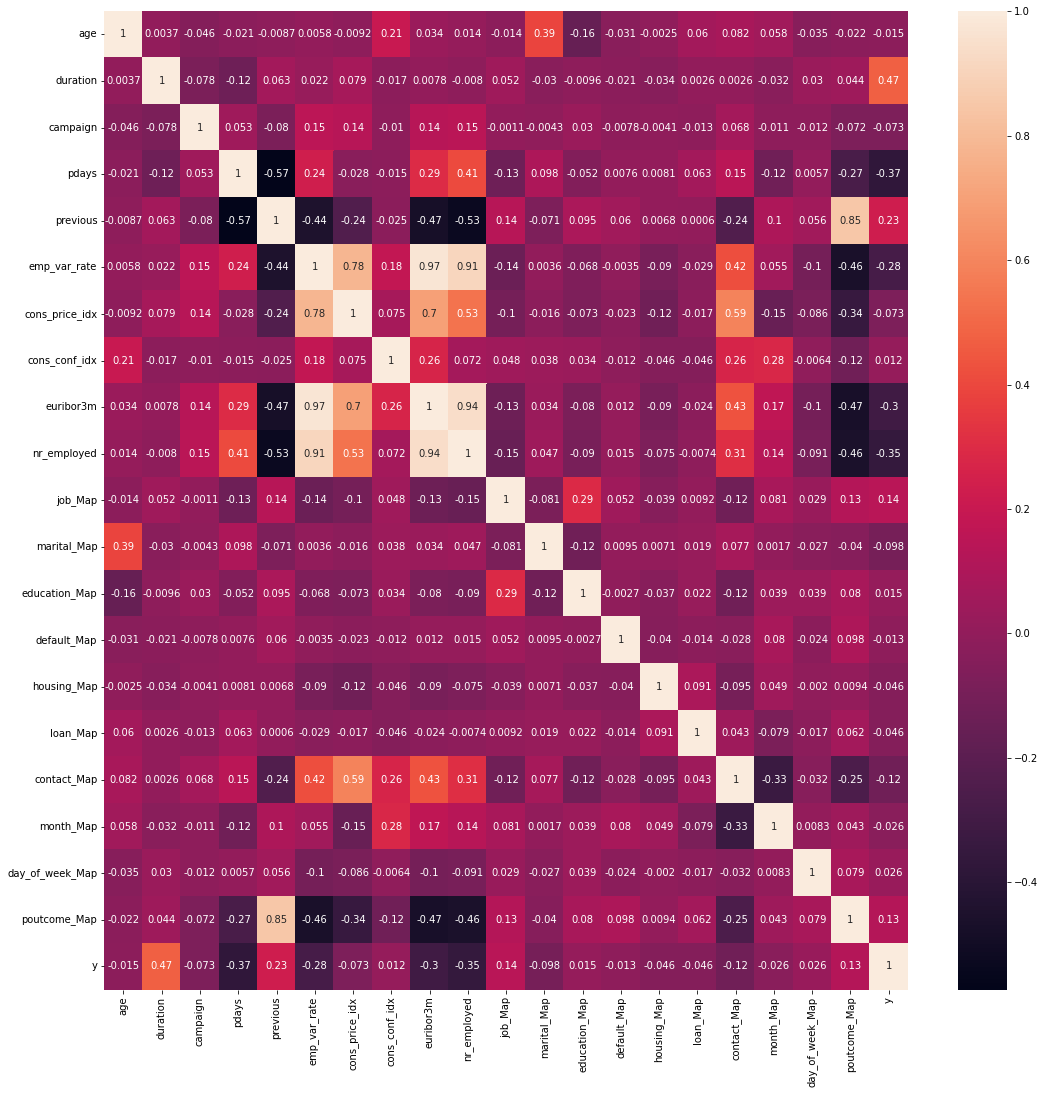

In [ ]:
plt.rcParams['figure.figsize'] = (18,18)
corrMatrix = df_clean3.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# *Due to the fact that these three variables: **eurobor3m**, **emp_var_rate** and **nr_employed** are hightly correlated, i will eliminate the columns **eurobor3m_Map** and **emp_var_rate_Map**. In addition the two columns are less correlated with column **"y"** than **nr_employed**.

# I can observe the same thing with column **poutcome** and **previous**. Therefore i will delete the **poutcome** column.

In [ ]:
df_clean3.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_Map', 'marital_Map', 'education_Map', 'default_Map', 'housing_Map',
       'loan_Map', 'contact_Map', 'month_Map', 'day_of_week_Map',
       'poutcome_Map', 'y'],
      dtype='object')

In [ ]:
df_clean4 = df_clean3.drop(columns=['euribor3m','poutcome_Map','emp_var_rate'], axis=1)

In [ ]:
df_clean4

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map,y
0,33.0,110.0,1.0,999.0,0.0,93.444,-36.1,5228.1,6.0,1.0,4.0,0.0,1.0,0.0,0.0,8.0,4.0,0.0
1,36.0,423.0,1.0,999.0,0.0,92.893,-46.2,5099.1,2.0,2.0,5.0,0.0,1.0,1.0,0.0,5.0,5.0,0.0
2,37.0,204.0,1.0,999.0,0.0,92.893,-46.2,5099.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,0.0
3,57.0,50.0,2.0,999.0,0.0,93.994,-36.4,5191.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,5.0,0.0
4,34.0,106.0,3.0,999.0,0.0,92.893,-46.2,5099.1,5.0,1.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,34.0,264.0,1.0,999.0,0.0,93.918,-42.7,5228.1,2.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0
756,39.0,935.0,3.0,999.0,0.0,93.994,-36.4,5191.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0
757,34.0,118.0,3.0,999.0,0.0,93.444,-36.1,5228.1,5.0,0.0,5.0,0.0,1.0,0.0,0.0,8.0,1.0,0.0
758,75.0,233.0,1.0,999.0,0.0,92.843,-50.0,5099.1,4.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0


In [ ]:
df_clean4.shape

(760, 18)

# **Download the training data**

In [ ]:
#from google.colab import files
#df_clean4.to_csv('df_to_train.csv', sep=',', index=None, header=True)
#files.download("df_to_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Training the Model**  *without Hyperdrive*

In [ ]:
X_train = df_clean4.iloc[:,:-1]
Y_train = df_clean4.iloc[:,-1]

In [ ]:
X_train.shape

(760, 17)

In [ ]:
model = XGBClassifier(scoring='roc_auc')
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              seed=None, silent=None, subsample=1, verbosity=1)

# **Get Predictions**

**KNNImputer in X_test for missing data**

In [ ]:
x_test.shape

(326, 20)

In [ ]:
colums_myTest = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_Map', 'marital_Map', 'education_Map', 'default_Map', 'housing_Map',
       'loan_Map', 'contact_Map', 'month_Map', 'day_of_week_Map',
       'poutcome_Map']

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
myArray2 = imputer.fit_transform(x_test)
#Convert to Dataframe:
X_test =pd.DataFrame(myArray2, columns=colums_myTest)
X_test

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map,poutcome_Map
0,48.0,427.0,3.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,5.0,2.0,4.0,0.0,1.0,0.0,1.0,5.0,5.0,0.0
1,46.0,179.0,2.0,999.0,0.0,1.4,94.465,-41.8,4.864,5228.1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,2.0,0.0
2,37.0,94.0,7.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,5.0,0.0
3,31.0,37.0,3.0,999.0,0.0,-1.8,92.893,-46.2,1.281,5099.1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,3.0,0.0
4,28.0,23.0,1.0,999.0,1.0,-1.8,92.893,-46.2,1.281,5099.1,1.0,1.0,2.0,0.0,1.0,0.0,0.0,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,27.0,191.0,2.0,999.0,1.0,-1.8,93.075,-47.1,1.410,5099.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0
322,29.0,736.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.076,5195.8,5.0,0.0,5.0,0.0,1.0,1.0,0.0,11.0,4.0,0.0
323,31.0,1279.0,3.0,999.0,0.0,-1.8,92.893,-46.2,1.281,5099.1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0,0.0
324,35.0,259.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.965,5228.1,1.0,0.0,4.0,0.0,1.0,1.0,0.0,8.0,2.0,0.0


In [ ]:
X_test.drop(columns=['euribor3m','poutcome_Map','emp_var_rate'], axis=1, inplace=True)
X_test.shape

(326, 17)

# **Download the Test data**

In [ ]:
#X_test.to_csv('df_to_test.csv', sep=',', index=None, header=True)
#files.download("df_to_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Predictions:**

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


# **Evaluating the model**

In [ ]:
acc = accuracy_score(y_test, y_pred, normalize=True,sample_weight=None)
print("Accuracy: {:.2f} %".format(acc.mean()*100))

Accuracy: 91.72 %


# **---------------------------------Training Without Column "duration"--------------------------**

I am going to remove the ***duration*** because maybe it is influencing too much and it does not make sense to me that the time of a call influences more than other features.

In [ ]:
X_train.shape

(760, 17)

In [ ]:
X_train_duration = X_train.drop(columns=['duration'])
X_train_duration

,age,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map
0,33.0,1.0,999.0,0.0,93.444,-36.1,5228.1,6.0,1.0,4.0,0.0,1.0,0.0,0.0,8.0,4.0
1,36.0,1.0,999.0,0.0,92.893,-46.2,5099.1,2.0,2.0,5.0,0.0,1.0,1.0,0.0,5.0,5.0
2,37.0,1.0,999.0,0.0,92.893,-46.2,5099.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0
3,57.0,2.0,999.0,0.0,93.994,-36.4,5191.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,5.0
4,34.0,3.0,999.0,0.0,92.893,-46.2,5099.1,5.0,1.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,34.0,1.0,999.0,0.0,93.918,-42.7,5228.1,2.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0
756,39.0,3.0,999.0,0.0,93.994,-36.4,5191.0,6.0,1.0,2.0,0.0,1.0,0.0,1.0,5.0,1.0
757,34.0,3.0,999.0,0.0,93.444,-36.1,5228.1,5.0,0.0,5.0,0.0,1.0,0.0,0.0,8.0,1.0
758,75.0,1.0,999.0,0.0,92.843,-50.0,5099.1,4.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0


In [ ]:
X_train_duration.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed', 'job_Map', 'marital_Map',
       'education_Map', 'default_Map', 'housing_Map', 'loan_Map',
       'contact_Map', 'month_Map', 'day_of_week_Map'],
      dtype='object')

**Training the model:**

In [ ]:
model_duration = XGBClassifier()
model_duration.fit(X_train_duration, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Prediction:**

In [ ]:
X_test_duration = X_test.drop(columns=['duration'], axis=1)
X_test_duration.shape

(326, 16)

In [ ]:
X_test_duration.head(1)

,age,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job_Map,marital_Map,education_Map,default_Map,housing_Map,loan_Map,contact_Map,month_Map,day_of_week_Map
0,48.0,3.0,999.0,0.0,93.994,-36.4,5191.0,5.0,2.0,4.0,0.0,1.0,0.0,1.0,5.0,5.0


In [ ]:
y_pred_duration = model_duration.(X_predicttest_duration)

**Accuracy**

In [ ]:
acc_duration = accuracy_score(y_test, y_pred_duration, normalize=True,sample_weight=None)
print("Accuracy: {:.2f} %".format(acc_duration.mean()*100))

Accuracy: 90.49 %


# -----------------------Finished Training Without Column "duration"-------------------------

# **First conclusion: The difference between acc= 91.72%  and  acc_duration= 90.49% isn't significant. Therefore i will keep the  "duration"  column**

#----------------------------------NEXT-----------------**THE BEST APROCH**-----------------------------

# **Training the Model** ----->  **WITH Hyperdrive**

# **Tunning Hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'learning_rate': [0.01,0.1,0.5,1], 'max_depth': [4,5,6], 'gamma': [0,0.1,0.2], 'min_child_weight': [4,5,6], 'subsample': [0.5,0.8,0.9]}]
model_grid = GridSearchCV(estimator = XGBClassifier(colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                param_grid = parameters, scoring='roc_auc', n_jobs=4,iid=False, cv=3)

model_grid.fit(X_train, Y_train)
best_accuracy = model_grid.best_score_
best_parameters = model_grid.best_params_

print("Best Roc_Auc: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Roc_Auc: 94.53 %
Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.9}


# **Predictions:**

In [ ]:
y_pred_grid = model_grid.predict(X_test)

# **Accuracy Score:**

In [ ]:
acc_grid = accuracy_score(y_test, y_pred_grid, normalize=True, sample_weight=None)
print("Accuracy: {:.2f} %".format(acc_grid.mean()*100))

Accuracy: 92.02 %


# **Finally the best model we had is the model_grid with 92.02% of accuracy & parameters:**

**gamma: 0**

**learning_rate: 0.01**

**max_depth: 4**

**min_child_weight: 4**

**subsample: 0.9**

# **Download the y_test column**

*Exporting y_test:*

In [ ]:
y_test = pd.DataFrame(y_test, columns=['y'])
y_test.tail()

,y
321,0
322,1
323,1
324,0
325,0


In [ ]:
from google.colab import files
#y_test.to_csv('y_test.csv', sep=',', index=None, header=True)
#files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Columns to consider for consume the Web Service:**



In [ ]:
['age', 'duration', 'campaign', 'pdays', 'previous', 'cons_price_idx',
      'cons_conf_idx', 'nr_employed', 'job_Map', 'marital_Map',
       'education_Map', 'default_Map', 'housing_Map', 'loan_Map',
       'contact_Map', 'month_Map', 'day_of_week_Map']

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons_price_idx',
 'cons_conf_idx',
 'nr_employed',
 'job_Map',
 'marital_Map',
 'education_Map',
 'default_Map',
 'housing_Map',
 'loan_Map',
 'contact_Map',
 'month_Map',
 'day_of_week_Map']

In [ ]:
import pandas as pd

data = {
'Class': [
'blue-collar', 'technician', 'management', 'services', 'retired', 'admin','housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'student',
'single', 'married', 'divorced',                 
'basic.4y', 'basic.6y', 'basic.9y', 'high.school','professional.course', 'university.degree',
'no', 'yes',
'no', 'yes',
'no', 'yes',
'cellular', 'telephone',
'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep','oct','nov','dec',
'mon','tue','wed','thu','fri'
],
'value': [
0,1,2,3,4,5,6,7,8,9,10,
0,1,2,
0,1,2,3,4,5,              
0,1, 
0,1,
0,1,
0,1,                 
3,4,5,6,7,8,9,10,11,12,  
1,2,3,4,5             
]}
df = pd.DataFrame(data, index=[
'job_Map','job_Map','job_Map','job_Map','job_Map','job_Map','job_Map','job_Map','job_Map','job_Map','job_Map',
'marital_Map','marital_Map','marital_Map',
'education_Map', 'education_Map', 'education_Map', 'education_Map', 'education_Map', 'education_Map',
'default_Map','default_Map',
'housing_Map', 'housing_Map',
'loan_Map', 'loan_Map',
'contact_Map', 'contact_Map',
'month_Map','month_Map','month_Map','month_Map','month_Map','month_Map','month_Map','month_Map','month_Map','month_Map',
'day_of_week_Map','day_of_week_Map','day_of_week_Map','day_of_week_Map','day_of_week_Map'
])
df

,Class,value
job_Map,blue-collar,0
job_Map,technician,1
job_Map,management,2
job_Map,services,3
job_Map,retired,4
job_Map,admin,5
job_Map,housemaid,6
job_Map,unemployed,7
job_Map,entrepreneur,8
job_Map,self-employed,9
